In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
data = pd.read_csv('train.csv')

In [53]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [54]:
X = data.drop(['ID','TARGET'], axis=1)
y = data['TARGET']

In [55]:
X.shape, y.shape

((76020, 369), (76020,))

In [56]:
from sklearn.model_selection import train_test_split


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

In [59]:
from sklearn.feature_selection import VarianceThreshold

In [60]:
vt = VarianceThreshold(0.01)
X_train = vt.fit_transform(X_train)
X_test = vt.transform(X_test)

In [61]:
X_train.shape, X_test.shape

((60816, 266), (15204, 266))

In [62]:
X_train_t = X_train.T
X_test_t = X_test.T

In [63]:
X_train_t = pd.DataFrame(X_train_t)
X_test_t = pd.DataFrame(X_test_t)

In [64]:
X_train_t.duplicated().sum()

16

In [65]:
duplicated_features = X_train_t.duplicated()
features_to_keep = [not item for item in duplicated_features]    

In [66]:
X_train = X_train_t[features_to_keep].T
X_test = X_test_t[features_to_keep].T

In [67]:
X_train.shape, X_test.shape

((60816, 250), (15204, 250))

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
X_train, X_test

(array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
         -0.01990642,  0.07271318],
        [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
         -0.01990642,  0.73001879],
        [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
         -0.01990642, -0.0591358 ],
        ...,
        [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
         -0.01990642, -0.27045009],
        [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
         -0.01990642, -0.28583665],
        [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
         -0.01990642, -0.23183104]]),
 array([[ 3.82643815e-02, -7.89287122e-01, -5.25783749e-02, ...,
         -1.89568530e-02, -1.99064177e-02, -1.25860970e-01],
        [ 3.82643815e-02, -7.89287122e-01, -5.25783749e-02, ...,
         -1.89568530e-02, -1.99064177e-02,  1.50321513e-02],
        [ 3.82643815e-02,  8.23429638e-01, -5.25783749e-02, ...,
         -1.89568530e-02, -1.99064177e-02,  6.91637342e-

In [72]:
X_train = X_train.reshape(60816, 250, 1)
X_test = X_test.reshape(15204, 250, 1)

In [74]:
X_train.shape, X_test.shape

((60816, 250, 1), (15204, 250, 1))

In [75]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [76]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(250,1)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [77]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 248, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 248, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 124, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 124, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 122, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 122, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 61, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 61, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 59, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 59, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 29, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 29, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3712)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       950,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 982,721 (3.75 MB)

 Trainable params: 982,273 (3.75 MB)

 Non-trainable params: 448 (1.75 KB)

In [78]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [79]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
history =  model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9424 - loss: 0.2769 - val_accuracy: 0.9579 - val_loss: 0.1843
Epoch 2/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9602 - loss: 0.1741 - val_accuracy: 0.9584 - val_loss: 0.1833
Epoch 3/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9593 - loss: 0.1710 - val_accuracy: 0.9582 - val_loss: 0.1799
Epoch 4/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9610 - loss: 0.1640 - val_accuracy: 0.9583 - val_loss: 0.1735
Epoch 5/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9598 - loss: 0.1673 - val_accuracy: 0.9583 - val_loss: 0.1718
Epoch 6/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9610 - loss: 0.1586 - val_accuracy: 0.9583 - val_loss: 0.1693
Epoch 7/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9618 - loss: 0.1536 - val_accuracy: 0.9583 - val_loss: 0.1663
Epoch 8/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9603 -

In [85]:
y_pred = (model.predict(X_test)>0.5).astype('int32')

476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [86]:
print(y_pred[12]), print(y_test[12])

[0]
0


(None, None)

In [87]:
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14566     4]
 [  634     0]]


In [88]:
acc_cm = accuracy_score(y_test, y_pred)

In [89]:
print(acc_cm)

0.9580373585898447


# Learning Curve

In [90]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

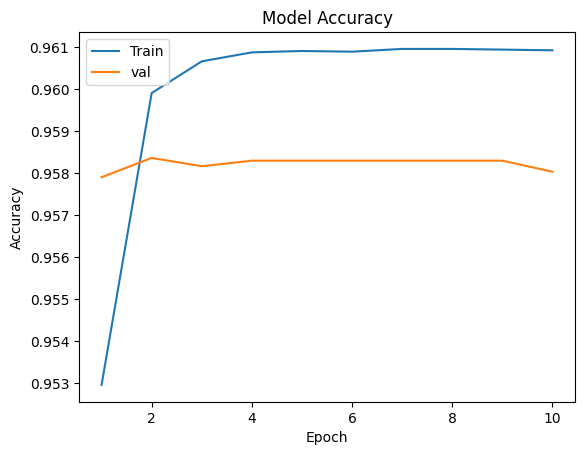

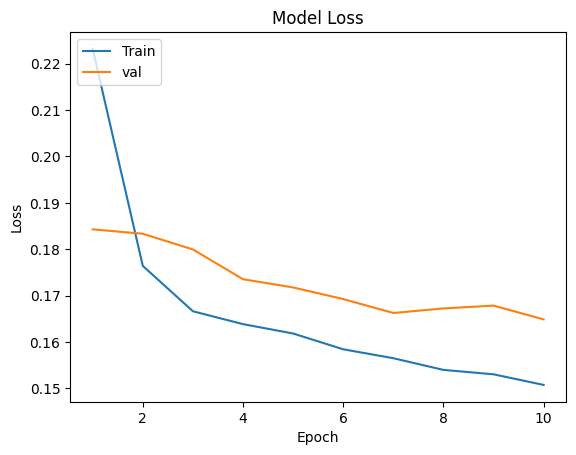

In [83]:
learning_curve(history, 10)